In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "shardingsphere"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Number of jobhours used by month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby([actions.project,actions.month]).count().reset_index().groupby("month").sum()

,jobhours
month,
2021-02,4955
2021-03,5672


## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                     
                                   sum      mean        max
repo                                                       
shardingsphere             2738.018611  2.074257  21.633056
shardingsphere-doc          114.857222  0.026587   0.433333
shardingsphere-elasticjob     5.453611  0.170425   0.200556

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                     
                                              sum      mean        max
repo                      workflowid                                  
shardingsphere            4733337     1483.171111  2.247229  21.633056
                          4733338     1254.847500  1.901284  12.632778
shardingsphere-doc        2143140       82.343889  0.059113   0.433333
                          2056120       32.513333  0.011108   0.140556
shardingsphere-elasticjob 3263817        2.777500  0.173594   0.200556
                          3263818        2.676111  0.167257   0.184167

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
1022686,apache,shardingsphere,642217884,1259,2021-03-11 09:01:20+00:00,2021-03-11 15:58:51+00:00,completed,failure,4733337,2021-03-11 09:41:00+00:00,2021-03-11 15:58:42+00:00,True,13,77879,shardingsphere,21.633056,2021-03
1022675,apache,shardingsphere,640051114,1249,2021-03-10 17:10:38+00:00,2021-03-10 23:20:59+00:00,completed,failure,4733337,2021-03-10 17:14:36+00:00,2021-03-10 23:20:50+00:00,True,13,77786,shardingsphere,21.607222,2021-03
1022681,apache,shardingsphere,641867788,1254,2021-03-11 06:33:12+00:00,2021-03-11 12:53:14+00:00,completed,failure,4733337,2021-03-11 06:33:57+00:00,2021-03-11 12:52:59+00:00,True,13,77706,shardingsphere,21.585000,2021-03
1022672,apache,shardingsphere,639384380,1246,2021-03-10 13:20:37+00:00,2021-03-10 19:21:41+00:00,completed,failure,4733337,2021-03-10 13:20:53+00:00,2021-03-10 19:21:18+00:00,True,13,77545,shardingsphere,21.540278,2021-03
1022685,apache,shardingsphere,642213923,1258,2021-03-11 08:59:48+00:00,2021-03-11 15:09:38+00:00,completed,failure,4733337,2021-03-11 09:08:22+00:00,2021-03-11 15:09:26+00:00,True,13,77390,shardingsphere,21.497222,2021-03
1022679,apache,shardingsphere,641793454,1252,2021-03-11 05:58:57+00:00,2021-03-11 12:06:14+00:00,completed,failure,4733337,2021-03-11 05:59:08+00:00,2021-03-11 12:06:01+00:00,True,13,77029,shardingsphere,21.396944,2021-03
1022677,apache,shardingsphere,641484865,1250,2021-03-11 03:19:31+00:00,2021-03-11 09:28:50+00:00,completed,failure,4733337,2021-03-11 03:21:59+00:00,2021-03-11 09:28:40+00:00,True,13,76889,shardingsphere,21.358056,2021-03
1022678,apache,shardingsphere,641749778,1251,2021-03-11 05:35:21+00:00,2021-03-11 11:42:38+00:00,completed,failure,4733337,2021-03-11 05:37:22+00:00,2021-03-11 11:42:25+00:00,True,13,76734,shardingsphere,21.315000,2021-03
1022680,apache,shardingsphere,641794049,1253,2021-03-11 05:59:29+00:00,2021-03-11 12:21:39+00:00,completed,failure,4733337,2021-03-11 06:20:15+00:00,2021-03-11 12:21:27+00:00,True,13,76423,shardingsphere,21.228611,2021-03
1022683,apache,shardingsphere,641926618,1256,2021-03-11 06:59:58+00:00,2021-03-11 13:27:30+00:00,completed,failure,4733337,2021-03-11 07:18:50+00:00,2021-03-11 13:27:16+00:00,True,13,75760,shardingsphere,21.044444,2021-03


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
39,apache,shardingsphere,unix (macos-latest),1273.826667
41,apache,shardingsphere,windows,894.978333
40,apache,shardingsphere,unix (ubuntu-latest),700.039722
29,apache,shardingsphere,MySQL-Proxy with Agent Metrics,221.439167
20,apache,shardingsphere,MySQL-JDBC with DB,215.851667
23,apache,shardingsphere,MySQL-JDBC with DBTBL-WITH-REPLICA-QUERY,199.177222
43,apache,shardingsphere-doc,publish PDF,186.665556
38,apache,shardingsphere,MySQL-Proxy with TBL,176.954722
28,apache,shardingsphere,MySQL-JDBC with TBL,172.868333
30,apache,shardingsphere,MySQL-Proxy with DB,171.221111


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
2,apache,shardingsphere,success,17011
4,apache,shardingsphere-doc,success,10666
1,apache,shardingsphere,failure,5276
0,apache,shardingsphere,cancelled,859
6,apache,shardingsphere-elasticjob,success,40
3,apache,shardingsphere-doc,failure,22
8,apache,shardingsphere-elasticjob-ui,success,4
7,apache,shardingsphere-elasticjob-ui,failure,3
5,apache,shardingsphere-elasticjob,failure,2


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

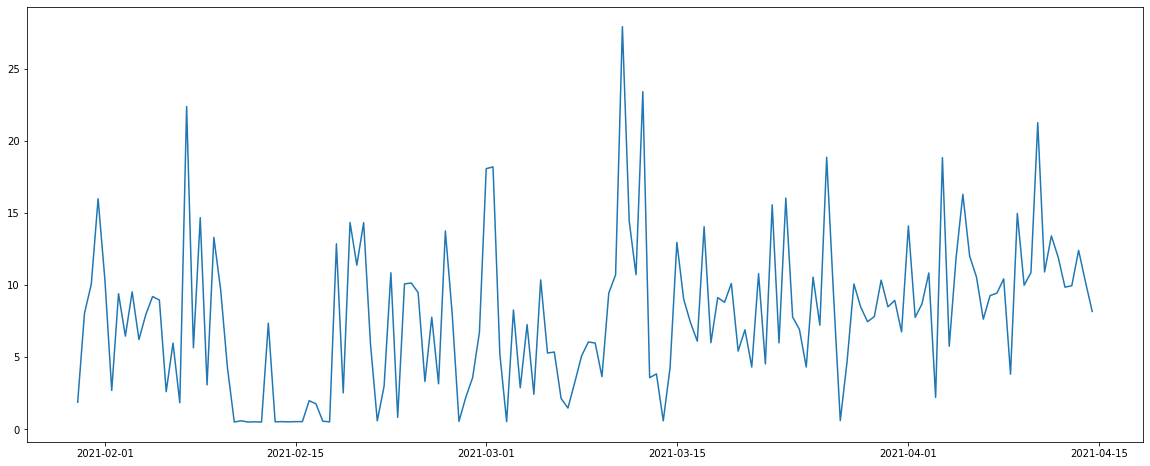

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

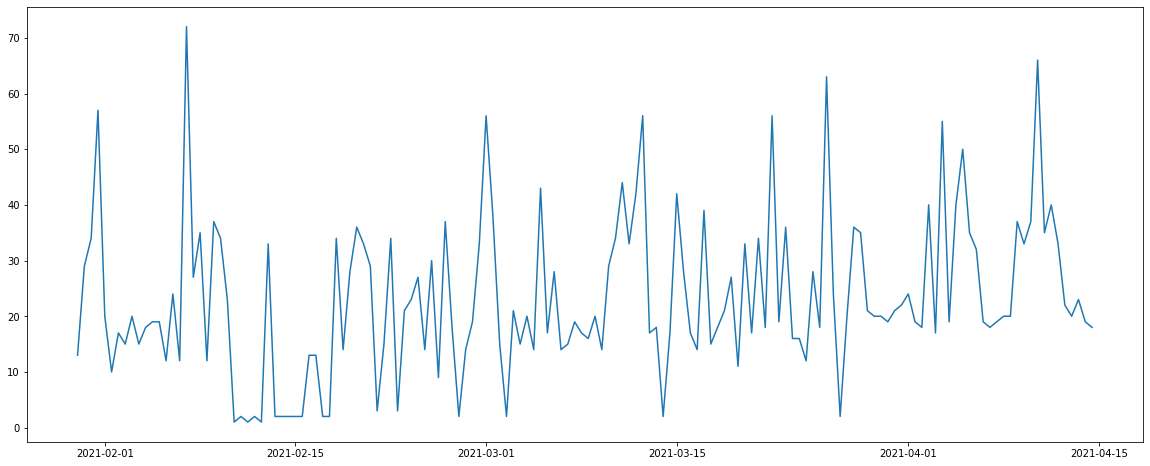

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()